In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Test_customers = pd.read_excel (r'database with financials_new.xlsx', sheet_name='uniquecustomers')

In [3]:
Test_customers.head()

,Customer,Customer Name,Legacy,LE LBay,LE Name LBay,Country LE + 1994 CoFD,Cluster LE + 1994 CoFD,Country Group LE + 1994 CoFD,Business,Sum of SOB 1/31/2019,...,Cash ratio(2019),Cash ratio(2020),Debt to equtiy ratio(2019),Debt to equtiy ratio(2020),ROA(2019),ROA(2020),Debt to EBIT(2019),Debt to EBIT(2020),Net profit margin(2019),Net profit margin(2020)
0,1873805,AGROMAR MARMARA TARIM URUNLERI,L-Mon,2624,"Monsanto/France,",France,North West Europe,France,CP+S&T,207829.35,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2068498,ATR Landhandel GmbH & Co. KG,L-Bay,425,Bayer/Danmark,Denmark,North West Europe,UK/Ireland/Nordics,CP+S&T,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7734057,CERSUL-AGRUPAMENTO PRODUTORES,L-Bay,1334,BCS Portugal/Carnaxide,Portugal,Mediterranean,West Med,CP+S&T,45990.48,...,0.000000,0.103548,0.000000,2.004728,0.000000,0.007463,0.000000,78.701883,0.000000,0.003497
3,1674428,CONSORZIO AGRARIO DEL PIEMONTE,L-Mon,2642,"Monsanto Agricoltura/Italy,",Italy,Mediterranean,Central Med,CP+S&T,29903.39,...,0.006136,0.000000,1.108660,0.000000,-0.109994,0.000000,-0.608075,0.000000,-0.075510,0.000000
4,8664678,Belchim Crop Protection N.V./S.A.,L-Bay,1340,Bayer CropScience/Belgium,Belgium,North West Europe,Benelux/Switzerland,CP+S&T,NaN,...,0.029392,0.028690,-10.098753,-16.924165,-0.011044,-0.025239,102.596776,67.393820,-0.014273,-0.028298


In [4]:
Test_customers.columns.values

array(['Customer', 'Customer Name', 'Legacy', 'LE LBay', 'LE Name LBay',
       'Country LE + 1994 CoFD', 'Cluster LE + 1994 CoFD',
       'Country Group LE + 1994 CoFD', 'Business', 'Sum of SOB 1/31/2019',
       'Sum of SOB 2/28/2019', 'Sum of SOB 3/31/2019',
       'Sum of SOB 4/30/2019', 'Sum of SOB 5/31/2019',
       'Sum of SOB 6/30/2019', 'Sum of SOB 7/31/2019',
       'Sum of SOB 8/31/2019', 'Sum of SOB 9/30/2019',
       'Sum of SOB 10/31/2019', 'Sum of SOB 11/30/2019',
       'Sum of SOB 12/31/2019', 'Sum of SOB 1/31/2020',
       'Sum of SOB 2/29/2020', 'Sum of SOB 3/31/2020',
       'Sum of SOB 4/30/2020', 'Sum of SOB 5/31/2020',
       'Sum of SOB 6/30/2020', 'Sum of SOB 7/31/2020',
       'Sum of SOB 8/31/2020', 'Sum of SOB 9/30/2020',
       'Sum of SOB 10/31/2020', 'Sum of SOB 11/30/2020',
       'Sum of SOB 12/31/2020', 'Sum of SOB 1/31/2021',
       'Sum of SOB 2/28/2021', 'Sum of SOB 3/31/2021',
       'Sum of SOB 4/30/2021', 'Sum of SOO 1/31/2019',
       'Sum of SO

In [5]:
Overdue_cus = Test_customers.drop(columns=['Customer Name','LE LBay', 'LE Name LBay','Cluster LE + 1994 CoFD',
       'Country Group LE + 1994 CoFD','Sum of SOB 1/31/2019',
       'Sum of SOB 2/28/2019', 'Sum of SOB 3/31/2019',
       'Sum of SOB 4/30/2019', 'Sum of SOB 5/31/2019',
       'Sum of SOB 6/30/2019', 'Sum of SOB 7/31/2019',
       'Sum of SOB 8/31/2019', 'Sum of SOB 9/30/2019',
       'Sum of SOB 10/31/2019', 'Sum of SOB 11/30/2019',
       'Sum of SOB 12/31/2019', 'Sum of SOB 1/31/2020',
       'Sum of SOB 2/29/2020', 'Sum of SOB 3/31/2020',
       'Sum of SOB 4/30/2020', 'Sum of SOB 5/31/2020',
       'Sum of SOB 6/30/2020', 'Sum of SOB 7/31/2020',
       'Sum of SOB 8/31/2020', 'Sum of SOB 9/30/2020',
       'Sum of SOB 10/31/2020', 'Sum of SOB 11/30/2020',
       'Sum of SOB 12/31/2020', 'Sum of SOB 1/31/2021',
       'Sum of SOB 2/28/2021', 'Sum of SOB 3/31/2021',
       'Sum of SOB 4/30/2021', 'Sum of SOO 1/31/2019',
       'Sum of SOO 2/28/2019', 'Sum of SOO 3/31/2019',
       'Sum of SOO 4/30/2019', 'Sum of SOO 5/31/2019',
       'Sum of SOO 6/30/2019', 'Sum of SOO 7/31/2019',
       'Sum of SOO 8/31/2019', 'Sum of SOO 9/30/2019',
       'Sum of SOO 10/31/2019', 'Sum of SOO 11/30/2019',
       'Sum of SOO 12/31/2019', 'Sum of SOO 1/31/2020',
       'Sum of SOO 2/29/2020', 'Sum of SOO 3/31/2020',
       'Sum of SOO 4/30/2020', 'Sum of SOO 5/31/2020',
       'Sum of SOO 6/30/2020', 'Sum of SOO 7/31/2020',
       'Sum of SOO 8/31/2020', 'Sum of SOO 9/30/2020',
       'Sum of SOO 10/31/2020', 'Sum of SOO 11/30/2020',
       'Sum of SOO 12/31/2020', 'Sum of SOO 1/31/2021',
       'Sum of SOO 2/28/2021', 'Sum of SOO 3/31/2021',
       'Sum of SOO 4/30/2021', 'Sum of (1-30days) 1/31/2019',
       'Sum of (1-30days) 2/28/2019', 'Sum of (1-30days) 3/31/2019',
       'Sum of (1-30days) 4/30/2019', 'Sum of (1-30days) 5/31/2019',
       'Sum of (1-30days) 6/30/2019', 'Sum of (1-30days) 7/31/2019',
       'Sum of (1-30days) 8/31/2019', 'Sum of (1-30days) 9/30/2019',
       'Sum of (1-30days) 10/31/2019', 'Sum of (1-30days) 11/30/2019',
       'Sum of (1-30days) 12/31/2019', 'Sum of (1-30days) 1/31/2020',
       'Sum of (1-30days) 2/29/2020', 'Sum of (1-30days) 3/31/2020',
       'Sum of (1-30days) 4/30/2020', 'Sum of (1-30days) 5/31/2020',
       'Sum of (1-30days) 6/30/2020', 'Sum of (1-30days) 7/31/2020',
       'Sum of (1-30days) 8/31/2020', 'Sum of (1-30days) 9/30/2020',
       'Sum of (1-30days) 10/31/2020', 'Sum of (1-30days) 11/30/2020',
       'Sum of (1-30days) 12/31/2020', 'Sum of (1-30days) 1/31/2021',
       'Sum of (1-30days) 2/28/2021', 'Sum of (1-30days) 3/31/2021',
       'Sum of (1-30days) 4/30/2021', 'Sum of (31-60days) 1/31/2019',
       'Sum of (31-60days) 2/28/2019', 'Sum of (31-60days) 3/31/2019',
       'Sum of (31-60days) 4/30/2019', 'Sum of (31-60days) 5/31/2019',
       'Sum of (31-60days) 6/30/2019', 'Sum of (31-60days) 7/31/2019',
       'Sum of (31-60days) 8/31/2019', 'Sum of (31-60days) 9/30/2019',
       'Sum of (31-60days) 10/31/2019', 'Sum of (31-60days) 11/30/2019',
       'Sum of (31-60days) 12/31/2019', 'Sum of (31-60days) 1/31/2020',
       'Sum of (31-60days) 2/29/2020', 'Sum of (31-60days) 3/31/2020',
       'Sum of (31-60days) 4/30/2020', 'Sum of (31-60days) 5/31/2020',
       'Sum of (31-60days) 6/30/2020', 'Sum of (31-60days) 7/31/2020',
       'Sum of (31-60days) 8/31/2020', 'Sum of (31-60days) 9/30/2020',
       'Sum of (31-60days) 10/31/2020', 'Sum of (31-60days) 11/30/2020',
       'Sum of (31-60days) 12/31/2020', 'Sum of (31-60days) 1/31/2021',
       'Sum of (31-60days) 2/28/2021', 'Sum of (31-60days) 3/31/2021',
       'Sum of (31-60days) 4/30/2021', 'Sum of (>60days) 1/31/2019',
       'Sum of (>60days) 2/28/2019', 'Sum of (>60days) 3/31/2019',
       'Sum of (>60days) 4/30/2019', 'Sum of (>60days) 5/31/2019',
       'Sum of (>60days) 6/30/2019', 'Sum of (>60days) 7/31/2019',
       'Sum of (>60days) 8/31/2019', 'Sum of (>60days) 9/30/2019',
       'Sum of (>60days) 10/31/2019', 'Sum of (>60days) 11/30/2019',
       'Sum of (>60days) 12/31/2019', 'Sum of (>60days) 1/31/2020',
       'Sum of (>60days) 2/29/2020', 'Sum of (>60days) 3/31/2020',
       'Sum of (>60days) 4/30/2020', 'Sum of (>60days) 5/31/2020',
       'Sum of (>60days) 6/30/2020', 'Sum of (>60days) 7/31/2020',
       'Sum of (>60days) 8/31/2020', 'Sum of (>60days) 9/30/2020',
       'Sum of (>60days) 10/31/2020', 'Sum of (>60days) 11/30/2020',
       'Sum of (>60days) 12/31/2020', 'Sum of (>60days) 1/31/2021',
       'Sum of (>60days) 2/28/2021', 'Sum of (>60days) 3/31/2021',
       'Sum of (>60days) 4/30/2021',
       'Sum of Total Sum of Balance Rep.Curr. EUR',
       'Sum of Total Sum of Overdue Rep.Curr. EUR',
       'Sum of Total Sum of Overdue 1 - 30 RC EUR',
       'Sum of Total Sum of Overdue 31 - 60 RC EUR',
       'Sum of Total Sum of > 60', 'CreditLimit vsAR Average','Risk Category'])

In [6]:
Overdue_cus.head()

,Customer,Legacy,Country LE + 1994 CoFD,Business,Likely Overdue,AR Count Total,Overdue Count Total,(1-30days count) Total,(31-60 days count) Total,(> 60 days count) Total,...,Cash ratio(2019),Cash ratio(2020),Debt to equtiy ratio(2019),Debt to equtiy ratio(2020),ROA(2019),ROA(2020),Debt to EBIT(2019),Debt to EBIT(2020),Net profit margin(2019),Net profit margin(2020)
0,1873805,L-Mon,France,CP+S&T,1,22,14,6,6,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2068498,L-Bay,Denmark,CP+S&T,0,1,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7734057,L-Bay,Portugal,CP+S&T,1,28,21,14,6,8,...,0.000000,0.103548,0.000000,2.004728,0.000000,0.007463,0.000000,78.701883,0.000000,0.003497
3,1674428,L-Mon,Italy,CP+S&T,1,28,28,1,1,26,...,0.006136,0.000000,1.108660,0.000000,-0.109994,0.000000,-0.608075,0.000000,-0.075510,0.000000
4,8664678,L-Bay,Belgium,CP+S&T,0,9,0,0,0,0,...,0.029392,0.028690,-10.098753,-16.924165,-0.011044,-0.025239,102.596776,67.393820,-0.014273,-0.028298


In [7]:
Overdue_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       47 non-null     int64  
 1   Legacy                         47 non-null     object 
 2   Country LE + 1994 CoFD         47 non-null     object 
 3   Business                       47 non-null     object 
 4   Likely Overdue                 47 non-null     int64  
 5   AR Count Total                 47 non-null     int64  
 6   Overdue Count Total            47 non-null     int64  
 7   (1-30days count) Total         47 non-null     int64  
 8   (31-60 days count) Total       47 non-null     int64  
 9   (> 60 days count) Total        47 non-null     int64  
 10  1-30 days vs AR                47 non-null     float64
 11  31-60 days vs AR               47 non-null     float64
 12  > 60 days vs AR                47 non-null     float

# Data Exploration

In [8]:
#print(Overdue_cus.groupby(['Likely Overdue']).mean())
print(Overdue_cus.groupby('Country LE + 1994 CoFD')['Likely Overdue'].value_counts())

Country LE + 1994 CoFD  Likely Overdue
Austria                 1                 1
Belgium                 0                 2
                        1                 1
Czech Republic          0                 3
Denmark                 0                 3
France                  1                 6
                        0                 3
Germany                 0                 5
Ireland                 1                 1
Italy                   1                 6
                        0                 1
Japan                   0                 1
Netherlands             0                 1
Poland                  0                 2
Portugal                1                 1
Russian Fed.            0                 1
South Africa            0                 1
Spain                   1                 4
                        0                 1
United Kingdom          0                 3
Name: Likely Overdue, dtype: int64


C:\Users\GMOQT\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AR Average ', ylabel='Density'>

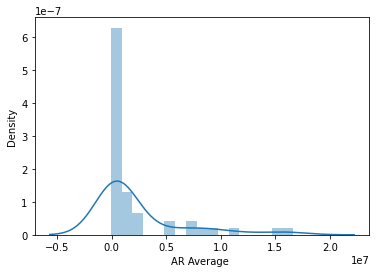

In [9]:
sns.distplot(Overdue_cus['AR Average '])

C:\Users\GMOQT\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AR Count Total', ylabel='Density'>

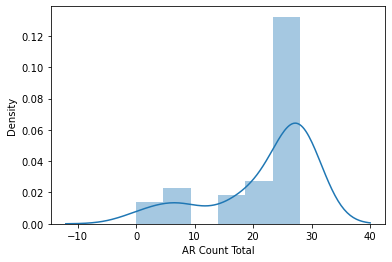

In [10]:
sns.distplot(Overdue_cus['AR Count Total'])

<AxesSubplot:xlabel='Likely Overdue', ylabel='AR Count Total'>

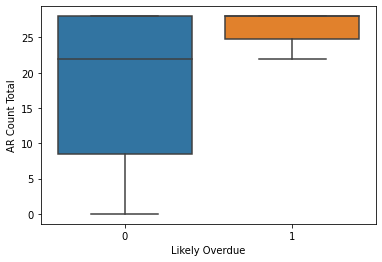

In [11]:
sns.boxplot(x = 'Likely Overdue',
            y = 'AR Count Total',
            data = Overdue_cus,
            sym = "")

<AxesSubplot:>

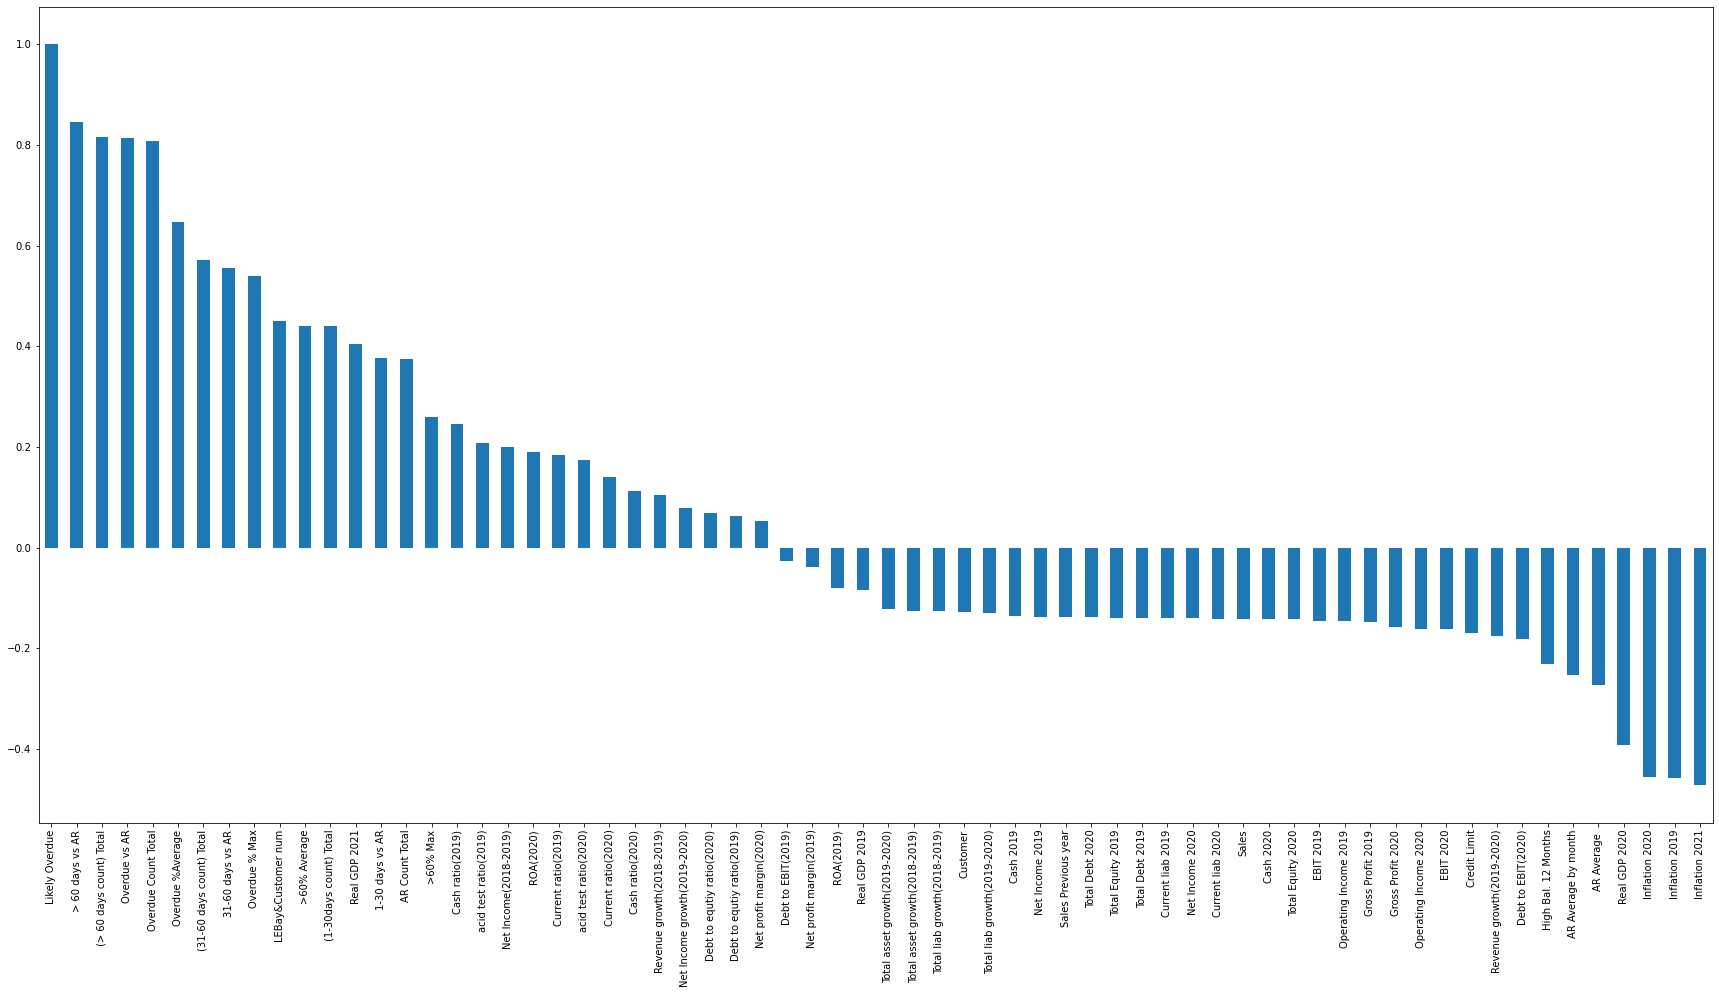

In [12]:
#Get Correlation of "Overdue" with other variables:
plt.figure(figsize=(30,15))
Overdue_cus.corr()['Likely Overdue'].sort_values(ascending = False).plot(kind='bar')

Based on the results above, i would show a confusion matrix of variables with correlation greater than 0.4 either positively or negatively.

In [13]:
Overdue_cus.columns.values

array(['Customer', 'Legacy', 'Country LE + 1994 CoFD', 'Business',
       'Likely Overdue', 'AR Count Total', 'Overdue Count Total',
       '(1-30days count) Total', '(31-60 days count) Total',
       '(> 60 days count) Total', '1-30 days vs AR', '31-60 days vs AR',
       '> 60 days vs AR', 'Overdue vs AR', 'Overdue %Average',
       'Overdue % Max', '>60% Average', '>60% Max', 'AR Average ',
       'AR Average by month', 'LEBay&Customer num', 'Credit Limit',
       'Sales', 'Sales Previous year', 'High Bal. 12 Months',
       'Risk Category name', 'Real GDP 2019', 'Real GDP 2020',
       'Real GDP 2021', 'Inflation 2019', 'Inflation 2020',
       'Inflation 2021', 'Cash 2019', 'Cash 2020', 'EBIT 2019',
       'EBIT 2020', 'Gross Profit 2019', 'Gross Profit 2020',
       'Net Income 2019', 'Net Income 2020', 'Operating Income 2019',
       'Operating Income 2020', 'Total Debt 2019', 'Total Debt 2020',
       'Total Equity 2019', 'Total Equity 2020', 'Current liab 2019',
       'Curren

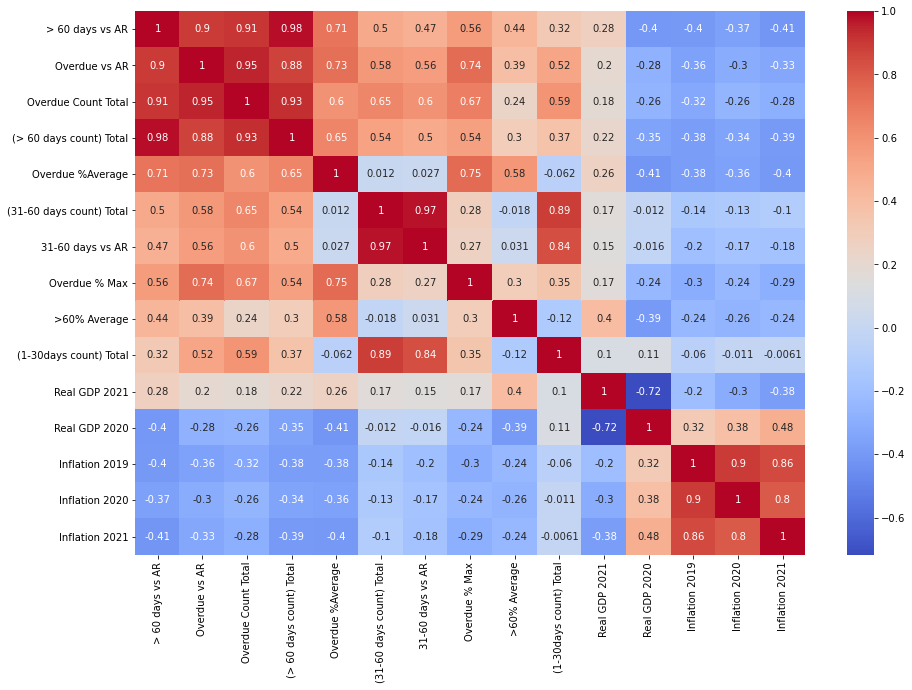

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data=Overdue_cus[['> 60 days vs AR', 'Overdue vs AR','Overdue Count Total','(> 60 days count) Total','Overdue %Average',
                              '(31-60 days count) Total','31-60 days vs AR','Overdue % Max','>60% Average','(1-30days count) Total',
                              'Real GDP 2021', 'Real GDP 2020', 'Inflation 2019', 'Inflation 2020', 'Inflation 2021']].corr(),
            annot=True, cmap='coolwarm');

### Exploring Categorical variables

Text(0.5, 1.0, '% of Risk Category')

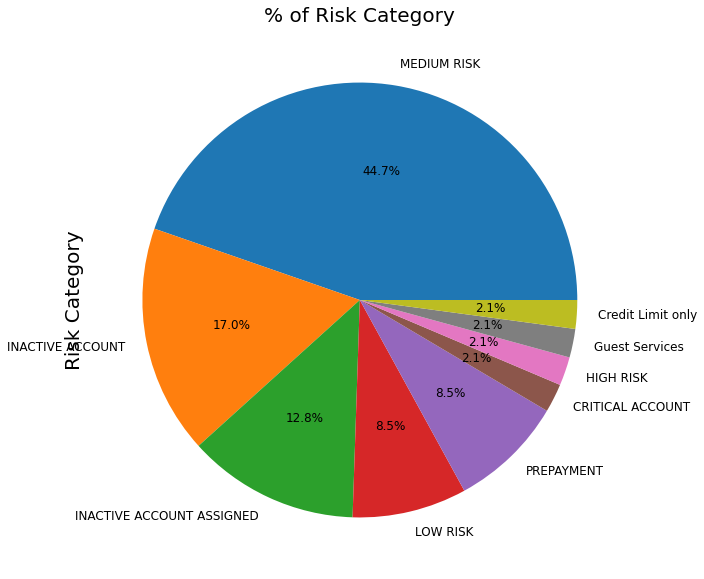

In [15]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

ax = (Overdue_cus['Risk Category name'].value_counts()*100.0 /len(Overdue_cus))\
.plot.pie(autopct='%.1f%%', labels = ['MEDIUM RISK','INACTIVE ACCOUNT', 'INACTIVE ACCOUNT ASSIGNED','LOW RISK', 
                                      'PREPAYMENT', 'CRITICAL ACCOUNT','HIGH RISK', 'Guest Services','Credit Limit only'],figsize =(10,10), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Risk Category',fontsize = 20)
ax.set_title('% of Risk Category', fontsize = 20)

Text(0.5, 1.0, '% of Customers')

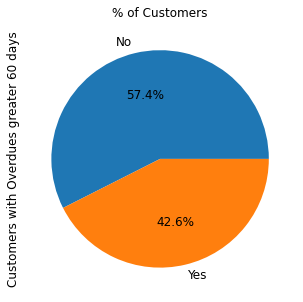

In [16]:
ax = (Overdue_cus['Likely Overdue'].value_counts()*100.0 /len(Overdue_cus))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Customers with Overdues greater 60 days',fontsize = 12)
ax.set_title('% of Customers', fontsize = 12)

Text(0.5, 1.0, '% of Overdues by Business')

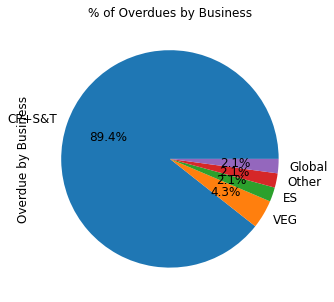

In [17]:
ax = (Overdue_cus['Business'].value_counts()*100.0 /len(Overdue_cus))\
.plot.pie(autopct='%.1f%%', labels = ['CP+S&T', 'VEG', 'ES', 'Other', 'Global'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Overdue by Business',fontsize = 12)
ax.set_title('% of Overdues by Business', fontsize = 12)

## Prediction Models

### Logistic Regression

Logistic regression doesn't work well with categorical variables, so i would transform the categorical variables using the one hot encoding, to help aid seemless prediction.

In [18]:
# Create two data sets for numeric and non-numeric data
Overdue_num = Overdue_cus.select_dtypes(exclude=['object'])
Overdue_str = Overdue_cus.select_dtypes(include=['object'])

In [19]:
# One-hot encode the non-numeric columns
Overdue_str_onehot = pd.get_dummies(Overdue_str)

In [20]:
# Union the one-hot encoded columns to the numeric ones
Overdue_prep = pd.concat([Overdue_num, Overdue_str_onehot], axis=1)

In [21]:
print(Overdue_prep.columns)

Index(['Customer', 'Likely Overdue', 'AR Count Total', 'Overdue Count Total',
       '(1-30days count) Total', '(31-60 days count) Total',
       '(> 60 days count) Total', '1-30 days vs AR', '31-60 days vs AR',
       '> 60 days vs AR', 'Overdue vs AR', 'Overdue %Average', 'Overdue % Max',
       '>60% Average', '>60% Max', 'AR Average ', 'AR Average by month',
       'LEBay&Customer num', 'Credit Limit', 'Sales', 'Sales Previous year',
       'High Bal. 12 Months', 'Real GDP 2019', 'Real GDP 2020',
       'Real GDP 2021', 'Inflation 2019', 'Inflation 2020', 'Inflation 2021',
       'Cash 2019', 'Cash 2020', 'EBIT 2019', 'EBIT 2020', 'Gross Profit 2019',
       'Gross Profit 2020', 'Net Income 2019', 'Net Income 2020',
       'Operating Income 2019', 'Operating Income 2020', 'Total Debt 2019',
       'Total Debt 2020', 'Total Equity 2019', 'Total Equity 2020',
       'Current liab 2019', 'Current liab 2020', 'Revenue growth(2018-2019)',
       'Revenue growth(2019-2020)', 'Net Income(

In [22]:
Overdue_prep.head()

,Customer,Likely Overdue,AR Count Total,Overdue Count Total,(1-30days count) Total,(31-60 days count) Total,(> 60 days count) Total,1-30 days vs AR,31-60 days vs AR,> 60 days vs AR,...,Business_VEG,Risk Category name_CRITICAL ACCOUNT,Risk Category name_Credit Limit only,Risk Category name_Guest Services,Risk Category name_HIGH RISK,Risk Category name_INACTIVE ACCOUNT,Risk Category name_INACTIVE ACCOUNT ASSIGNED,Risk Category name_LOW RISK,Risk Category name_MEDIUM RISK,Risk Category name_PREPAYMENT
0,1873805,1,22,14,6,6,8,0.272727,0.272727,0.363636,...,0,0,0,0,0,0,0,0,1,0
1,2068498,0,1,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
2,7734057,1,28,21,14,6,8,0.500000,0.214286,0.285714,...,0,0,0,0,0,0,0,0,1,0
3,1674428,1,28,28,1,1,26,0.035714,0.035714,0.928571,...,0,0,0,0,0,1,0,0,0,0
4,8664678,0,9,0,0,0,0,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Create feature variable
X = Overdue_prep.drop('Likely Overdue', axis=1)

In [24]:
# Create target variable
y = Overdue_prep['Likely Overdue']

In [25]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30)

In [28]:
len(X_train)

32

In [29]:
len(X_test)

15

In [30]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [31]:
# Print the models coefficients
print(clf_logistic.coef_)

[[-0.07302043  0.48413645  0.74717187  0.39374669  0.46637271  0.74116294
   0.20707397  0.40254923  0.81781195  0.674971    0.50473859  0.35007384
   0.23717045  0.09314553 -0.13426111 -0.12491638  0.31851908 -0.07304873
  -0.06472112 -0.06481624 -0.28715944  0.1138852  -0.29762822  0.68780248
  -0.3261972  -0.45476253 -0.32958808 -0.05949784 -0.05999942 -0.0624448
  -0.06348886 -0.0676716  -0.06813449 -0.06024606 -0.06123041 -0.06244686
  -0.06348886 -0.05981626 -0.05930125 -0.06176287 -0.06214602 -0.06288118
  -0.0627422   0.01361941 -0.14999041  0.10792713  0.11213571 -0.16650509
  -0.22262431 -0.13809302 -0.21160541  0.0843681  -0.02436423  0.09111822
   0.00500696  0.13743821  0.01492156 -0.04706731 -0.03933611 -0.04948164
   0.07161135  0.09240536 -0.00380001 -0.06853775  0.06716192 -0.37402442
   0.37402957  0.09106582 -0.15003654 -0.10405065 -0.52605085  0.47133661
  -0.44906082  0.270796    0.33752829 -0.09156471 -0.1384493  -0.14749114
   0.38117982  0.         -0.12115003  

In [32]:
# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

In [33]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

In [34]:
# Reassign overdue status based on the threshold
preds_df['overdue_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

In [35]:
# Print the row counts for each overdue status
print(preds_df['overdue_status'].value_counts())

0    10
1     5
Name: overdue_status, dtype: int64


In [36]:
# Print the classification report
from sklearn.metrics import classification_report

target_names = ['Non-Overdue', 'Overdue']
print(classification_report(y_test, preds_df['overdue_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Overdue       1.00      0.91      0.95        11
     Overdue       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15



In [37]:
# Print all the non-average values from the report
from sklearn.metrics import precision_recall_fscore_support

print(precision_recall_fscore_support(y_test,preds_df['overdue_status']))

(array([1. , 0.8]), array([0.90909091, 1.        ]), array([0.95238095, 0.88888889]), array([11,  4], dtype=int64))


0.9333333333333333


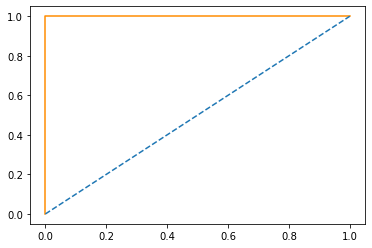

In [38]:
# Print the accuracy score the model
from sklearn.metrics import roc_curve, roc_auc_score

print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

In [39]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,preds_df['overdue_status']))

[[10  1]
 [ 0  4]]


In [40]:
preds_df

,prob_default,overdue_status
0,0.154723,0
1,0.960824,1
2,0.131191,0
3,0.103688,0
4,0.038720,0
5,0.311973,0
6,0.588554,1
7,0.102107,0
8,0.106821,0
9,0.103200,0


In [41]:
y_test

36    0
21    1
29    0
10    0
23    0
37    0
7     0
18    0
17    0
30    0
4     0
34    1
14    1
1     0
3     1
Name: Likely Overdue, dtype: int64

## Using XGBoost Model to Predict

In [43]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier(use_label_encoder=False).fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_xg = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])
true_df_xg = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df_xg.reset_index(drop = True), preds_df_xg], axis = 1))

[16:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Likely Overdue  prob_default
0                0      0.028642
1                1      0.951121
2                0      0.046439
3                0      0.046439
4                0      0.028642
5                0      0.211468
6                0      0.046439
7                0      0.046439
8                0      0.046439
9                0      0.057294
10               0      0.046439
11               1      0.581475
12               1      0.462840
13               0      0.046439
14               1      0.959387


In [44]:
# Reassign overdue status based on the threshold
preds_df_xg['overdue_status'] = preds_df_xg['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

In [59]:
preds_df_xg

,prob_default,overdue_status
0,0.028642,0
1,0.951121,1
2,0.046439,0
3,0.046439,0
4,0.028642,0
5,0.211468,0
6,0.046439,0
7,0.046439,0
8,0.046439,0
9,0.057294,0


In [58]:
print(confusion_matrix(y_test,preds_df_xg['overdue_status']))

[[11  0]
 [ 1  3]]


In [45]:
# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'> 60 days vs AR': 8, 'Customer': 1, '>60% Average': 6, 'AR Average ': 1, 'Net Income(2018-2019)': 1, 'Current liab 2019': 1, '(31-60 days count) Total': 1, 'Debt to equtiy ratio(2019)': 1, 'Cash 2020': 1}


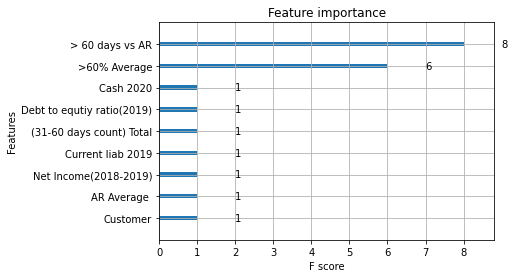

In [46]:
# Plot the column importance for this model
xgb.plot_importance(clf_gbt, importance_type = 'weight')
plt.show()

In [47]:
#gbt_preds = gbt.predict(X_test)
gbt2_preds = clf_gbt.predict(X_test)

# Print the classification report of the first model
target_names = ['Non-Overdue', 'Overdue']
print(classification_report(y_test, gbt2_preds, target_names=target_names))


              precision    recall  f1-score   support

 Non-Overdue       0.92      1.00      0.96        11
     Overdue       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15



In [48]:
# Set the values for number of folds and stopping iterations
n_folds = 2
early_stopping = 5
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.972222       0.027778       0.829365      0.115079
1        0.972222       0.027778       0.829365      0.115079
2        0.972222       0.027778       0.829365      0.115079
3        0.996031       0.003968       0.857143      0.142857
4        1.000000       0.000000       0.857143      0.142857


In [49]:
# Calculate the cross validation scores for 4 folds
from sklearn.model_selection import cross_val_score

gbt_xgb2 = xgb.XGBClassifier(learning_rate = 0.5, max_depth = 5, use_label_encoder=False)
cv_scores = cross_val_score(gbt_xgb2, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

[16:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Compare Models to choose the best

In [50]:
# Print the logistic regression classification report
target_names = ['Non-Overdue', 'Overdue']
print(classification_report(y_test, preds_df['overdue_status'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_xg['overdue_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df['overdue_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_xg['overdue_status'], average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Overdue       1.00      0.91      0.95        11
     Overdue       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15

              precision    recall  f1-score   support

 Non-Overdue       0.92      1.00      0.96        11
     Overdue       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15

0.9206349206349207
0.9068322981366459


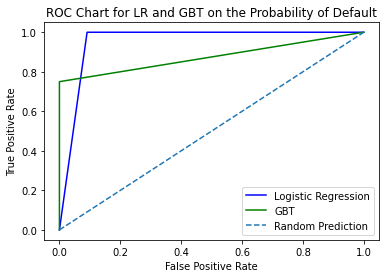

In [63]:
# ROC chart components
#prob_default_lr = preds[:, 1]
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, preds_df['overdue_status'])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, preds_df_xg['overdue_status'])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [52]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test,  preds_df['overdue_status']))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, preds_df_xg['overdue_status']))

Logistic Regression AUC Score: 0.95
Gradient Boosted Tree AUC Score: 0.88


In [53]:
clf_logistic

LogisticRegression()

In [54]:
from sklearn.calibration import calibration_curve
total = calibration_curve(y_test, preds_df['overdue_status'], n_bins = 2)

In [55]:
total_gb = calibration_curve(y_test, preds_df_xg['overdue_status'], n_bins = 2)

In [56]:
mean = total[0]
fraction_lr = total[1]
fraction_gb = total_gb[1]

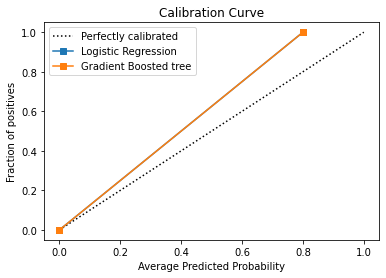

In [57]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean, fraction_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean, fraction_gb,
         's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

From the scores above, Logistic regression is the best model.

In [67]:
from sklearn import metrics
metrics.accuracy_score(y_test, preds_df['overdue_status'])

0.9333333333333333

In [68]:
metrics.accuracy_score(y_test, preds_df_xg['overdue_status'])

0.9333333333333333